In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error


In [28]:
#we combined ODI_Match_data.csv and ODI_Match_data.csv to get merged_dataset.csv
df = pd.read_csv('../Processed_data/merged_dataset.csv')
df

/var/folders/l8/jdn1xck51310wmn1brm7nq3c0000gn/T/ipykernel_4764/1744355405.py:2: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Processed_data/merged_dataset.csv')


,id,season_x,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281259,1179272,2019,Harare,2019/04/10,Zimbabwe,United Arab Emirates,Zimbabwe,field,normal,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1179272
281260,1179272,2019,Harare,2019/04/10,Zimbabwe,United Arab Emirates,Zimbabwe,field,normal,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1179272
281261,1179272,2019,Harare,2019/04/10,Zimbabwe,United Arab Emirates,Zimbabwe,field,normal,0,...,NaN,NaN,NaN,NaN,NaN,caught,CR Ervine,NaN,NaN,1179272
281262,1179272,2019,Harare,2019/04/10,Zimbabwe,United Arab Emirates,Zimbabwe,field,normal,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1179272


In [29]:
teams = ['England', 'South Africa', 'Netherlands', 'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']

# removing teams that aren't playing in this world cup
filtered_df = df[df['team1'].isin(teams) & df['team2'].isin(teams)]

df = filtered_df


In [30]:
df

,id,season_x,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277379,1152841,2019,London,2019/05/08,England,Pakistan,England,field,normal,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1152841
277380,1152841,2019,London,2019/05/08,England,Pakistan,England,field,normal,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1152841
277381,1152841,2019,London,2019/05/08,England,Pakistan,England,field,normal,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1152841
277382,1152841,2019,London,2019/05/08,England,Pakistan,England,field,normal,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1152841


In [31]:
#EDA - 

print("Basic Statistics:")
df.describe()

Basic Statistics:


,id,dl_applied,win_by_runs,win_by_wickets,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,cricsheet_id
count,1.094640e+05,109464.000000,109464.000000,109464.000000,1.094640e+05,109464.000000,109464.000000,109464.000000,109464.000000,2565.000000,273.0,168.000000,976.000000,3.0,0.0,0.0,1.094640e+05
mean,1.267382e+06,0.054182,40.665735,2.193616,1.267382e+06,1.459137,22.851390,0.864650,0.045887,1.192982,1.0,2.011905,1.369877,5.0,NaN,NaN,1.267382e+06
std,8.377408e+04,0.226378,55.519024,3.052433,8.377408e+04,0.498824,13.848376,1.312777,0.286397,0.788340,0.0,1.331282,0.897560,0.0,NaN,NaN,8.377408e+04
min,1.144483e+06,0.000000,0.000000,0.000000,1.144483e+06,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN,1.144483e+06
25%,1.187028e+06,0.000000,0.000000,0.000000,1.187028e+06,1.000000,11.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN,1.187028e+06
50%,1.277097e+06,0.000000,14.000000,0.000000,1.277097e+06,1.000000,22.300000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN,1.277097e+06
75%,1.339619e+06,0.000000,67.000000,5.000000,1.339619e+06,2.000000,34.300000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0,NaN,NaN,1.339619e+06
max,1.395701e+06,1.000000,317.000000,10.000000,1.395701e+06,4.000000,49.900000,6.000000,6.000000,5.000000,1.0,4.000000,4.000000,5.0,NaN,NaN,1.395701e+06


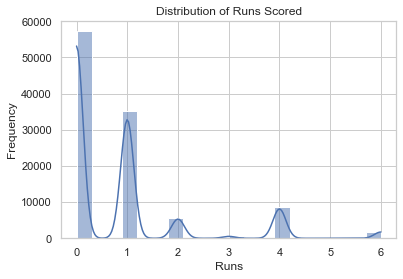

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'runs_off_bat'
sns.histplot(df['runs_off_bat'], bins=20, kde=True)
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


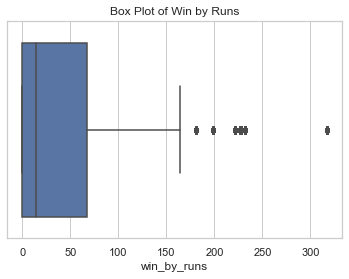

In [33]:
# Box plot for 'win_by_runs'
sns.boxplot(x=df['win_by_runs'])
plt.title('Box Plot of Win by Runs')
plt.show()


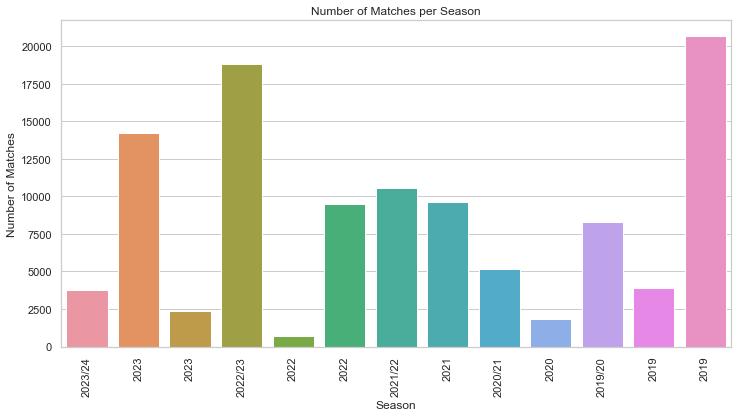

In [34]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(data=df, x="season_x") 
plt.xticks(rotation=90)
plt.title("Number of Matches per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()


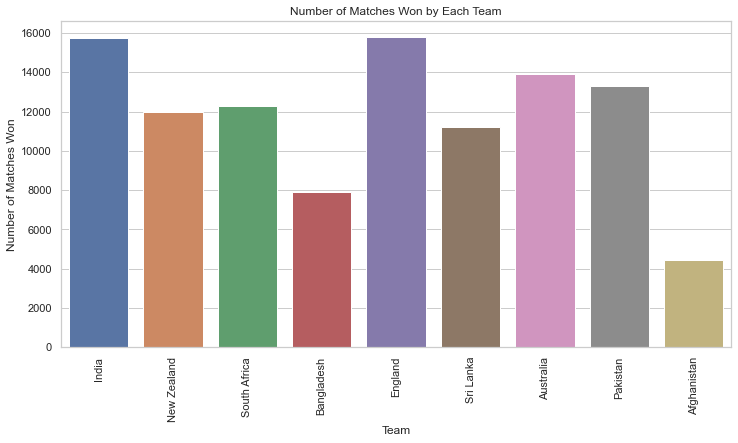

In [35]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(data=df, x="winner")
plt.xticks(rotation=90)
plt.title("Number of Matches Won by Each Team")
plt.xlabel("Team")
plt.ylabel("Number of Matches Won")
plt.show()


In [36]:
filtered_df = df[df['team1'].isin(teams) & df['team2'].isin(teams)]

filtered_df = filtered_df.dropna(subset=['winner'])

y = filtered_df['winner']
X = filtered_df[['team1', 'team2', 'venue_y']]

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model_winner = RandomForestClassifier(random_state=42)

model_winner.fit(X_train, y_train)

predictions_winner = model_winner.predict(X_test)

accuracy = accuracy_score(y_test, predictions_winner)
print("Accuracy:", accuracy)

Accuracy: 0.9302467398442631


In [37]:
#predicting match winner 
new_match = pd.DataFrame({
    'team1': ['India'],
    'team2': ['Australia'],
    'venue': ['Ahmedabad']
})

new_match_encoded = pd.get_dummies(new_match)

new_match_encoded = new_match_encoded.reindex(columns=X_encoded.columns, fill_value=0)

predicted_winner = model_winner.predict(new_match_encoded)

print("Predicted Winner:", predicted_winner)


Predicted Winner: ['India']


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

df_margin_runs = df.dropna(subset=['win_by_runs'])

y_margin_runs = df_margin_runs['win_by_runs']
X_margin_runs = df_margin_runs[['team1', 'team2', 'venue_y']]

X_margin_runs_encoded = pd.get_dummies(X_margin_runs)

X_train_margin_runs, X_test_margin_runs, y_train_margin_runs, y_test_margin_runs = train_test_split(
    X_margin_runs_encoded, y_margin_runs, test_size=0.2, random_state=42
)

model_margin_runs = RandomForestRegressor(random_state=42)

model_margin_runs.fit(X_train_margin_runs, y_train_margin_runs)

predictions_margin_runs = model_margin_runs.predict(X_test_margin_runs)

mae_margin_runs = mean_absolute_error(y_test_margin_runs, predictions_margin_runs)
print("Mean Absolute Error (Margin of Victory in Runs):", mae_margin_runs)

input_data = pd.DataFrame({
    'team1': ['India'],
    'team2': ['Australia'],
    'venue_y': ['Ahmedabad']
})

input_data_encoded = pd.get_dummies(input_data)

input_data_encoded = input_data_encoded.reindex(columns=X_train_margin_runs.columns, fill_value=0)

margin_runs_prediction = model_margin_runs.predict(input_data_encoded)

print("Predicted Margin of Victory in Runs:", margin_runs_prediction[0])


Mean Absolute Error (Margin of Victory in Runs): 7.834717842321417
Predicted Margin of Victory in Runs: 0.0


In [43]:
feature_importances = model_margin_runs.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_margin_runs_encoded.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                                              Feature  Importance
40  venue_y_Greenfield International Stadium, Thir...    0.112842
17                                     team2_Pakistan    0.068371
16                                  team2_New Zealand    0.063639
61                   venue_y_Melbourne Cricket Ground    0.053921
3                                       team1_England    0.053470
..                                                ...         ...
48  venue_y_JSCA International Stadium Complex, Ra...    0.000000
54                      venue_y_M.Chinnaswamy Stadium    0.000000
58                              venue_y_Mangaung Oval    0.000000
69  venue_y_Punjab Cricket Association IS Bindra S...    0.000000
51                                  venue_y_Kingsmead    0.000000

[102 rows x 2 columns]


In [44]:
top_n_features = 10
selected_features = feature_importance_df.head(top_n_features)['Feature']

X_margin_runs_selected = X_margin_runs_encoded[selected_features]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_margin_runs_selected, y_margin_runs, test_size=0.2, random_state=42
)

model_margin_runs_selected = RandomForestRegressor(random_state=42)

model_margin_runs_selected.fit(X_train_selected, y_train_selected)

predictions_margin_runs_selected = model_margin_runs_selected.predict(X_test_selected)

mae_margin_runs_selected = mean_absolute_error(y_test_selected, predictions_margin_runs_selected)
print("Mean Absolute Error (Adjusted Features):", mae_margin_runs_selected)


Mean Absolute Error (Adjusted Features): 34.74378210128788


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

filtered_data = df[df['team1'].isin(teams) & df['team2'].isin(teams)].copy()

filtered_data = filtered_data[['team1', 'team2', 'player_of_match']]

filtered_data = filtered_data.dropna()

le_team = LabelEncoder()
filtered_data['team1'] = le_team.fit_transform(filtered_data['team1'])
filtered_data['team2'] = le_team.transform(filtered_data['team2'])

le_player_of_match = LabelEncoder()
filtered_data['player_of_match'] = le_player_of_match.fit_transform(filtered_data['player_of_match'])

X = filtered_data[['team1', 'team2']]  
y = filtered_data['player_of_match']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4255071112147354
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00       230
           3       1.00      0.56      0.71       223
           4       0.00      0.00      0.00       101
           5       0.00      0.00      0.00       112
           6       0.35      1.00      0.52       121
           7       0.32      0.66      0.44       319
           8       0.00      0.00      0.00       210
           9       0.48      0.50      0.49       677
          10       1.00      1.00      1.00       101
          11       0.52      1.00      0.68       244
          12       0.00      0.00      0.00       301
          13       0.00      0.00      0.00        98
          14       0.50      1.00      0.66       105
          15       1.00      0.47      0.64       453
          16       0.50     

/Users/sumedhapandravada/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumedhapandravada/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumedhapandravada/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [46]:
# Transforming team names using the label encoders
team1_encoded = le_team.transform(['India'])[0]
team2_encoded = le_team.transform(['Australia'])[0]

input_data = pd.DataFrame({'team1': [team1_encoded], 'team2': [team2_encoded]})

predicted_player_of_match_encoded = model.predict(input_data)

predicted_player_of_match = le_player_of_match.inverse_transform(predicted_player_of_match_encoded)[0]

print("Predicted Player of the Match:", predicted_player_of_match)


Predicted Player of the Match: KL Rahul


In [47]:
bowling_df = df[['match_id', 'bowler', 'wicket_type', 'runs_off_bat', 'extras', 'batting_team', 'bowling_team']]

wickets_df = bowling_df[(bowling_df['wicket_type'].notnull()) & (bowling_df['bowling_team'].isin(['India', 'New Zealand']))]

india_players = ['RG Sharma', 'Shubman Gill', 'V Kohli', 'SS Iyer', 'KL Rahul', 'SA Yadav', 'RA Jadeja', 'Mohammed Shami', 'Kuldeep Yadav', 'JJ Bumrah', 'Mohammed Siraj']
aus_players = ['PJ Cummins', 'SPD Smith', 'AT Carey', 'JP Inglis', 'SA Abbott', 'C Green', 'JR Hazlewood', 'TM Head', 'M Labuschagne', 'MR Marsh', 'GJ Maxwell', 'MP Stoinis', 'DA Warner', 'A Zampa', 'MA Starc']

filtered_wickets_df = wickets_df[wickets_df['bowler'].isin(india_players + aus_players)]

bowler_stats = filtered_wickets_df.groupby('bowler').agg({'runs_off_bat': 'sum', 'wicket_type': 'count'}).reset_index()
bowler_stats.columns = ['bowler', 'runs_conceded', 'wickets_taken']


bowler_stats['bowling_figures'] = bowler_stats['runs_conceded'] / bowler_stats['wickets_taken']

best_bowler = bowler_stats.loc[bowler_stats['wickets_taken'] > 0].nsmallest(1, 'bowling_figures', 'all')

best_bowler_name = best_bowler['bowler'].values[0]

print("The player with the best bowling figures from the specified players in 'India' and 'New Zealand' is:", best_bowler_name)


The player with the best bowling figures from the specified players in 'India' and 'New Zealand' is: Kuldeep Yadav


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

teams = ['England', 'South Africa', 'Netherlands', 'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']

filtered_df = df[df['team1'].isin(teams) & df['team2'].isin(teams)]
filtered_df['total_runs_combined'] = filtered_df['win_by_runs'] + filtered_df['win_by_wickets']

y = filtered_df['total_runs_combined']
X = filtered_df[['team1', 'team2', 'venue_x']]

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model_total_runs = RandomForestRegressor(random_state=42)

model_total_runs.fit(X_train, y_train)

predictions_total_runs = model_total_runs.predict(X_test)

mse = mean_squared_error(y_test, predictions_total_runs)
print("Mean Squared Error:", mse)


Mean Squared Error: 317.8432577045088


In [49]:
teams = ['England', 'South Africa', 'Netherlands', 'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']
filtered_df = df[df['team1'].isin(teams) & df['team2'].isin(teams)]
df = filtered_df

# Update team1 and team2 to India and Australia
df['team1'] = 'India'
df['team2'] = 'Australia'

india_batting_df = df[df['batting_team'] == 'India']

india_run_scorer_df = india_batting_df.groupby('striker')['runs_off_bat'].sum().reset_index()

highest_run_scorer = india_run_scorer_df.sort_values(by='runs_off_bat', ascending=False).iloc[0]['striker']

print(f"The predicted highest run-scorer from Team India against Australia is: {highest_run_scorer}")


The predicted highest run-scorer from Team India against Australia is: V Kohli


In [50]:
teams = ['England', 'South Africa', 'Netherlands', 'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']
filtered_df = df[df['team1'].isin(teams) & df['team2'].isin(teams)]
df = filtered_df

df['team1'] = 'India'
df['team2'] = 'Australia'

india_batting_df = df[df['batting_team'] == 'Australia']

india_run_scorer_df = india_batting_df.groupby('striker')['runs_off_bat'].sum().reset_index()

highest_run_scorer = india_run_scorer_df.sort_values(by='runs_off_bat', ascending=False).iloc[0]['striker']

print(f"The predicted highest run-scorer from Team Australia against India is: {highest_run_scorer}")


The predicted highest run-scorer from Team Australia against India is: DA Warner


In [51]:
df['team1'] = 'India'
df['team2'] = 'Australia'

india_bowling_df = df[df['bowling_team'] == 'India']

india_wicket_taker_df = india_bowling_df.groupby('bowler')['player_dismissed'].count().reset_index()

highest_wicket_taker = india_wicket_taker_df.sort_values(by='player_dismissed', ascending=False).iloc[0]['bowler']

print(f"The predicted highest wicket-taker from Team India against Australia is: {highest_wicket_taker}")


The predicted highest wicket-taker from Team India against Australia is: Mohammed Shami


In [52]:
df['team1'] = 'India'
df['team2'] = 'Australia'

india_bowling_df = df[df['bowling_team'] == 'Australia']

india_wicket_taker_df = india_bowling_df.groupby('bowler')['player_dismissed'].count().reset_index()

highest_wicket_taker = india_wicket_taker_df.sort_values(by='player_dismissed', ascending=False).iloc[0]['bowler']

print(f"The predicted highest wicket-taker from Team Australia against is: {highest_wicket_taker}")


The predicted highest wicket-taker from Team Australia against is: A Zampa


In [53]:

india_batting_df = df[df['batting_team'] == 'India']
nz_batting_df = df[df['batting_team'] == 'Australia']
combined_batting_df = pd.concat([india_batting_df, nz_batting_df])

total_runs_per_match = combined_batting_df.groupby('match_id')['runs_off_bat'].sum().reset_index()

total_runs = total_runs_per_match['runs_off_bat'].sum()

total_matches = total_runs_per_match.shape[0]

average_runs_per_match = int(total_runs / total_matches)

print(f"The predicted average runs per match for both Team India and Team Australia combined is: {average_runs_per_match}")


The predicted average runs per match for both Team India and Team Australia combined is: 290


In [54]:

india_bowling_df = df[df['bowling_team'] == 'India']
nz_bowling_df = df[df['bowling_team'] == 'Australia']
combined_bowling_df = pd.concat([india_bowling_df, nz_bowling_df])

total_wickets_per_match = combined_bowling_df.groupby('match_id')['player_dismissed'].count().reset_index()

total_wickets = total_wickets_per_match['player_dismissed'].sum()

total_matches = total_wickets_per_match.shape[0]

average_wickets_per_match = int(total_wickets / total_matches)

print(f"The predicted average number of wickets per match between Team India and Team Australia is: {average_wickets_per_match}")


The predicted average number of wickets per match between Team India and Team Australia is: 8


In [55]:

india_nz_dismissals_df = df[(df['batting_team'] == 'India') | (df['batting_team'] == 'Australia')]

dismissal_data = india_nz_dismissals_df[['match_id', 'wicket_type']]

first_dismissal_mode = dismissal_data.groupby('match_id')['wicket_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

mode_of_first_dismissal = first_dismissal_mode['wicket_type'].mode().iloc[0]

print(f"The predicted mode of the first dismissal in matches between India and Australia is: {mode_of_first_dismissal}")


The predicted mode of the first dismissal in matches between India and Australia is: caught


In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

sixes_df = df[['season_x', 'date', 'team1', 'team2', 'innings', 'batting_team', 'runs_off_bat', 'extras']]
sixes_df = sixes_df[(sixes_df['runs_off_bat'] == 6) & (sixes_df['extras'] == 0)]

sixes_count = sixes_df.groupby(['season_x', 'date', 'team1', 'team2', 'batting_team']).size().unstack(fill_value=0).reset_index()

X = sixes_count.drop(['season_x', 'date'], axis=1)
y = sixes_count.sum(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['team1', 'team2', 'India', 'Australia']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

match_info_to_predict = pd.DataFrame({'team1': ['India'],
                                      'team2': ['Australia'],
                                      'India': [1],
                                      'Australia': [1]})

match_data = match_info_to_predict.merge(df, how='left', on=['team1', 'team2'])

sixes_match_data = match_data[['season_x', 'date', 'team1', 'team2', 'innings', 'batting_team', 'runs_off_bat', 'extras']]
sixes_match_data = sixes_match_data[(sixes_match_data['runs_off_bat'] == 6) & (sixes_match_data['extras'] == 0)]

sixes_count_match = sixes_match_data.groupby(['season_x', 'date', 'team1', 'team2', 'batting_team']).size().unstack(fill_value=0).reset_index()

X_match = sixes_count_match.drop(['season_x', 'date'], axis=1)
X_match = X_match.reindex(columns=X_train.columns, fill_value=0)

predictions = pipeline.predict(X_match)

average_prediction = int(predictions.mean())

print(f'Number of Sixes Prediction (Both Teams): {average_prediction}')


/var/folders/l8/jdn1xck51310wmn1brm7nq3c0000gn/T/ipykernel_4764/292715514.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = sixes_count.sum(axis=1)


Number of Sixes Prediction (Both Teams): 9
